In [0]:
import pandas as pd
from google.colab import files

In [0]:
uploaded = files.upload()

Saving news.csv to news.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "news.csv" with length 29598561 bytes


In [0]:
import io
frame = pd.read_csv(io.StringIO(uploaded['news.csv'].decode('utf-8')))

In [0]:
frame.head()

,Column1,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
#Setting the DataFrame index (row labels) using one or more existing columns
frame = frame.set_index("Column1")
frame.head()

,title,text,label
Column1,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
y = frame.label
y.head()

Column1
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [0]:
frame.shape

(6313, 3)

In [0]:
frame.drop("label", axis=1)
frame.head()

,title,text,label
Column1,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(frame['text'], y, test_size=0.33, random_state=53)

In [0]:
X_train.head()


Column1
3953    Obama On Climate Change: 'I Actually Think We'...
8546      Michael Snyder \r\nI realize that this headl...
968     Sen. Bernie Sanders won nearly three dozen del...
6997    Emails discovered during investigation of Jew ...
8817    Military An American soldier talks with Saudi ...
Name: text, dtype: object

In [0]:
y_train.head()

Column1
3953    REAL
8546    FAKE
968     REAL
6997    FAKE
8817    FAKE
Name: label, dtype: object

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

**Building Vectorizer Classifier using count vectorizer**
 

In [0]:

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train.values.astype('U'))

# Transform the test set 
count_test = count_vectorizer.transform(X_test.values.astype('U'))

**Building Vectorizer Classifier using tf-idf vectorizer**

In [0]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype('U')) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [0]:
print(tfidf_test)

  (0, 54124)	0.053885316975077084
  (0, 53582)	0.05295865266648468
  (0, 53158)	0.03768333897754591
  (0, 53146)	0.12140856243340054
  (0, 53144)	0.12140856243340054
  (0, 52915)	0.038114879527849796
  (0, 52740)	0.05503025902910852
  (0, 52721)	0.05423216504327272
  (0, 52390)	0.042235831616557695
  (0, 52073)	0.05141218438683597
  (0, 50971)	0.03860307130780342
  (0, 49959)	0.06582578460716769
  (0, 49212)	0.044632873142472725
  (0, 48774)	0.05054979471565239
  (0, 48713)	0.03521049033279361
  (0, 47908)	0.05151086629654433
  (0, 46819)	0.08790706511422013
  (0, 46242)	0.03337573666020689
  (0, 44536)	0.05118421018540563
  (0, 44243)	0.05313984339964104
  (0, 44203)	0.08166837390043835
  (0, 44199)	0.059250821610526465
  (0, 43870)	0.04796441099009676
  (0, 43640)	0.07159764743950338
  (0, 43626)	0.06226162841737523
  :	:
  (2083, 3710)	0.031003072876570236
  (2083, 3080)	0.0367056835435553
  (2083, 3042)	0.03185106265307273
  (2083, 3027)	0.028868508052328032
  (2083, 3022)	0.023547

In [0]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['תאמצנה', 'תוצאה', 'תחל', 'תיירות', 'תנותק', 'תעודת', 'תתרכז', 'القادمون', 'عربي', 'ยงade']


In [0]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[0:10])

['00', '000', '0000', '000000031', '00000031', '00006', '0001', '0001pt', '000ft', '001']


**Values of Token Generated by Both The Vectorizers Are Same** 


In [0]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,0000,000000031,00000031,00006,0001,0001pt,000ft,001,003,004,004s,005,006,00684,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,011,014,016,018,01am,02,020,022,023,024,025,027,02714,...,צה,קורא,קטיף,קיני,קצין,קשר,ראויה,ראש,רבה,רלוונטיים,רק,שאוסלו,שהוגדר,שהיא,שהיו,שהמבצע,שוך,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي,ยงade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

**Confision Matrix**

In [0]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Drawing Confusion Matrix With Tfidf Vectorizer**

accuracy:   0.857
Confusion matrix, without normalization


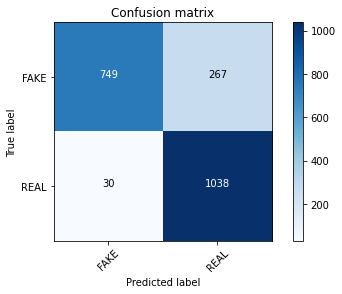

In [0]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Drawing Confusion Matrix With Bag Of Words (Count Vectorizer)**

accuracy:   0.901
Confusion matrix, without normalization


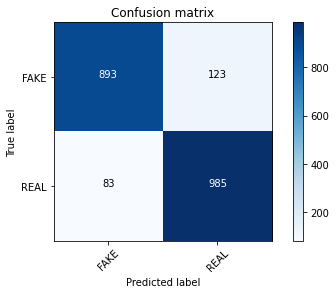

In [0]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Drawing Confusion Matrix With Passive Agressive Classifier**

accuracy:   0.934
Confusion matrix, without normalization


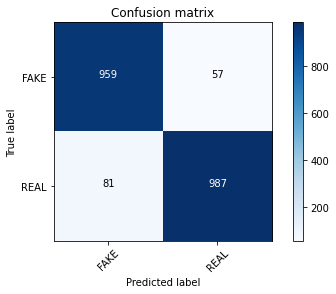

In [0]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Determining the fake and real news using classifier coefficients**

In [0]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
   
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.7292117266272315 2016
FAKE -4.671030197187676 october
FAKE -3.02297059250481 article
FAKE -2.9637025147225478 hillary
FAKE -2.9377667970061707 november
FAKE -2.7746511451779066 wikileaks
FAKE -2.629920136960687 war
FAKE -2.5947697851834626 share
FAKE -2.5627083458872324 establishment
FAKE -2.5160262672384865 source
FAKE -2.3792179704697154 print
FAKE -2.297342398105978 email
FAKE -2.2587355933005955 oct
FAKE -2.2518948382308097 advertisement
FAKE -2.089897153797246 election
FAKE -2.0732452130738075 snip
FAKE -1.8603910121950045 ayotte
FAKE -1.8512330624087971 photo
FAKE -1.8314200042353037 fbi
FAKE -1.8159311066586208 healthcare
FAKE -1.7994819575896854 com
FAKE -1.744340744310107 corporate
FAKE -1.738443597754045 mosul
FAKE -1.6690561712374656 pipeline
FAKE -1.6391532245938265 watch
FAKE -1.6209460405715093 sources
FAKE -1.5968591669436327 jewish
FAKE -1.568588212202558 uk
FAKE -1.5547856413033256 stated
FAKE -1.5237695023614761 youtube

REAL 5.033951971754984 said
REAL 2.4876

In [0]:
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.483209690286598, 'said'),
 (-4.57765801614449, 'trump'),
 (-4.967878322975084, 'clinton'),
 (-5.48723814746632, 'state'),
 (-5.500453649614771, 'people'),
 (-5.5406587828935585, 'president'),
 (-5.55725776761399, 'obama'),
 (-5.562051385315227, 'new'),
 (-5.622575905361444, 'campaign'),
 (-5.697950004427961, 'republican'),
 (-5.853835113093834, 'party'),
 (-5.964850536099271, 'time'),
 (-5.970858965951668, 'like'),
 (-5.99115187010334, 'states'),
 (-5.999385757709232, 'just'),
 (-6.0085220338848755, 'sanders'),
 (-6.060759936934209, 'percent'),
 (-6.093373951036635, 'house'),
 (-6.11680713905153, 'political'),
 (-6.1384245222027785, 'year')]

In [0]:
# Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-13.79049526831926, '0000'),
 (-13.79049526831926, '0001'),
 (-13.79049526831926, '0001pt'),
 (-13.79049526831926, '004s'),
 (-13.79049526831926, '005'),
 (-13.79049526831926, '00684'),
 (-13.79049526831926, '006s'),
 (-13.79049526831926, '007'),
 (-13.79049526831926, '007s'),
 (-13.79049526831926, '008s'),
 (-13.79049526831926, '0099'),
 (-13.79049526831926, '00am'),
 (-13.79049526831926, '00p'),
 (-13.79049526831926, '00pm'),
 (-13.79049526831926, '014'),
 (-13.79049526831926, '018'),
 (-13.79049526831926, '01am'),
 (-13.79049526831926, '02'),
 (-13.79049526831926, '020'),
 (-13.79049526831926, '023')]